In [28]:
import sys
# %{sys.executable} -m pip install umap-learn
# %{sys.executable} -m pip install scikit-learn
from sklearn.datasets import load_digits, load_iris
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
# %pip install dataget
import dataget
# %pip install gensim
from gensim.models import Word2Vec
from gensim.downloader import load
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import MDS, Isomap
from sklearn.decomposition import FactorAnalysis, PCA

In [46]:
iris = load_iris()
X = iris.data
y = iris.target

mds = MDS(n_components=2, metric=True, random_state=2)
X_mds = mds.fit_transform(X)

isomap = Isomap(n_neighbors=5, n_components=2, eigen_solver='auto')
X_isomap = isomap.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X, y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

fa = FactorAnalysis(n_components=2, random_state=2)
X_fa = fa.fit_transform(X)

pca = PCA(n_components=2)


c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [35]:
#mnist
start = time.time()
mnist = pd.read_csv("https://www.openml.org/data/get_csv/52667/mnist_784.csv")
mnist = mnist[:10000] # (70000, 785) -> (10000, 785)
display(f"Time of downloading mnist: {int(time.time() - start)} seconds")
                    
#digits
digits = load_digits()
X = digits.data
print(X.shape)
y = digits.target
display(f"Time of downloading digits: {int(time.time() - start)} seconds")
                    
#Fashion MNIST
start = time.time()
import dataget
__, __, fmnist_x, fmnist_y = dataget.image.fashion_mnist().get()
fmnist = fmnist_x.reshape(-1, 28*28)
display(f"Time of downloading fashion mnist: {int(time.time() - start)} seconds")      

'Time of downloading mnist: 31 seconds'

(1797, 64)


'Time of downloading fashion mnist: 9 seconds'

In [36]:
#Google news
start = time.time()
word_vectors = load('word2vec-google-news-300').vectors
display(f"Time of downloading google news: {int(time.time() - start)} seconds")

[======================----------------------------] 45.3% 753.0/1662.8MB downloaded

KeyboardInterrupt: 

In [47]:
models = [("MDS", mds), ("Isomap", isomap), ("LDA", lda), ("FA", fa), ("PCA", pca)]
datasets = [#("MNIST", mnist, mnist['class']), 
            #("Fashion MNIST", fmnist, fmnist_y),
            # ('Word Vectors', word_vectors, None)
            ("digits", digits.data, digits.target),
            ("iris", iris.data, iris.target)
            ]

'MDS is working with digits ((1797, 64) objects)...'

'Time: 103 seconds'

'MDS is working with iris ((150, 4) objects)...'

'Time: 0 seconds'

'Isomap is working with digits ((1797, 64) objects)...'

c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


'Time: 1 seconds'

'Isomap is working with iris ((150, 4) objects)...'

c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


'Time: 0 seconds'

'LDA is working with digits ((1797, 64) objects)...'

'Time: 0 seconds'

'LDA is working with iris ((150, 4) objects)...'

'Time: 0 seconds'

'FA is working with digits ((1797, 64) objects)...'

'Time: 0 seconds'

'FA is working with iris ((150, 4) objects)...'

'Time: 0 seconds'

'PCA is working with digits ((1797, 64) objects)...'

'Time: 0 seconds'

'PCA is working with iris ((150, 4) objects)...'

'Time: 0 seconds'

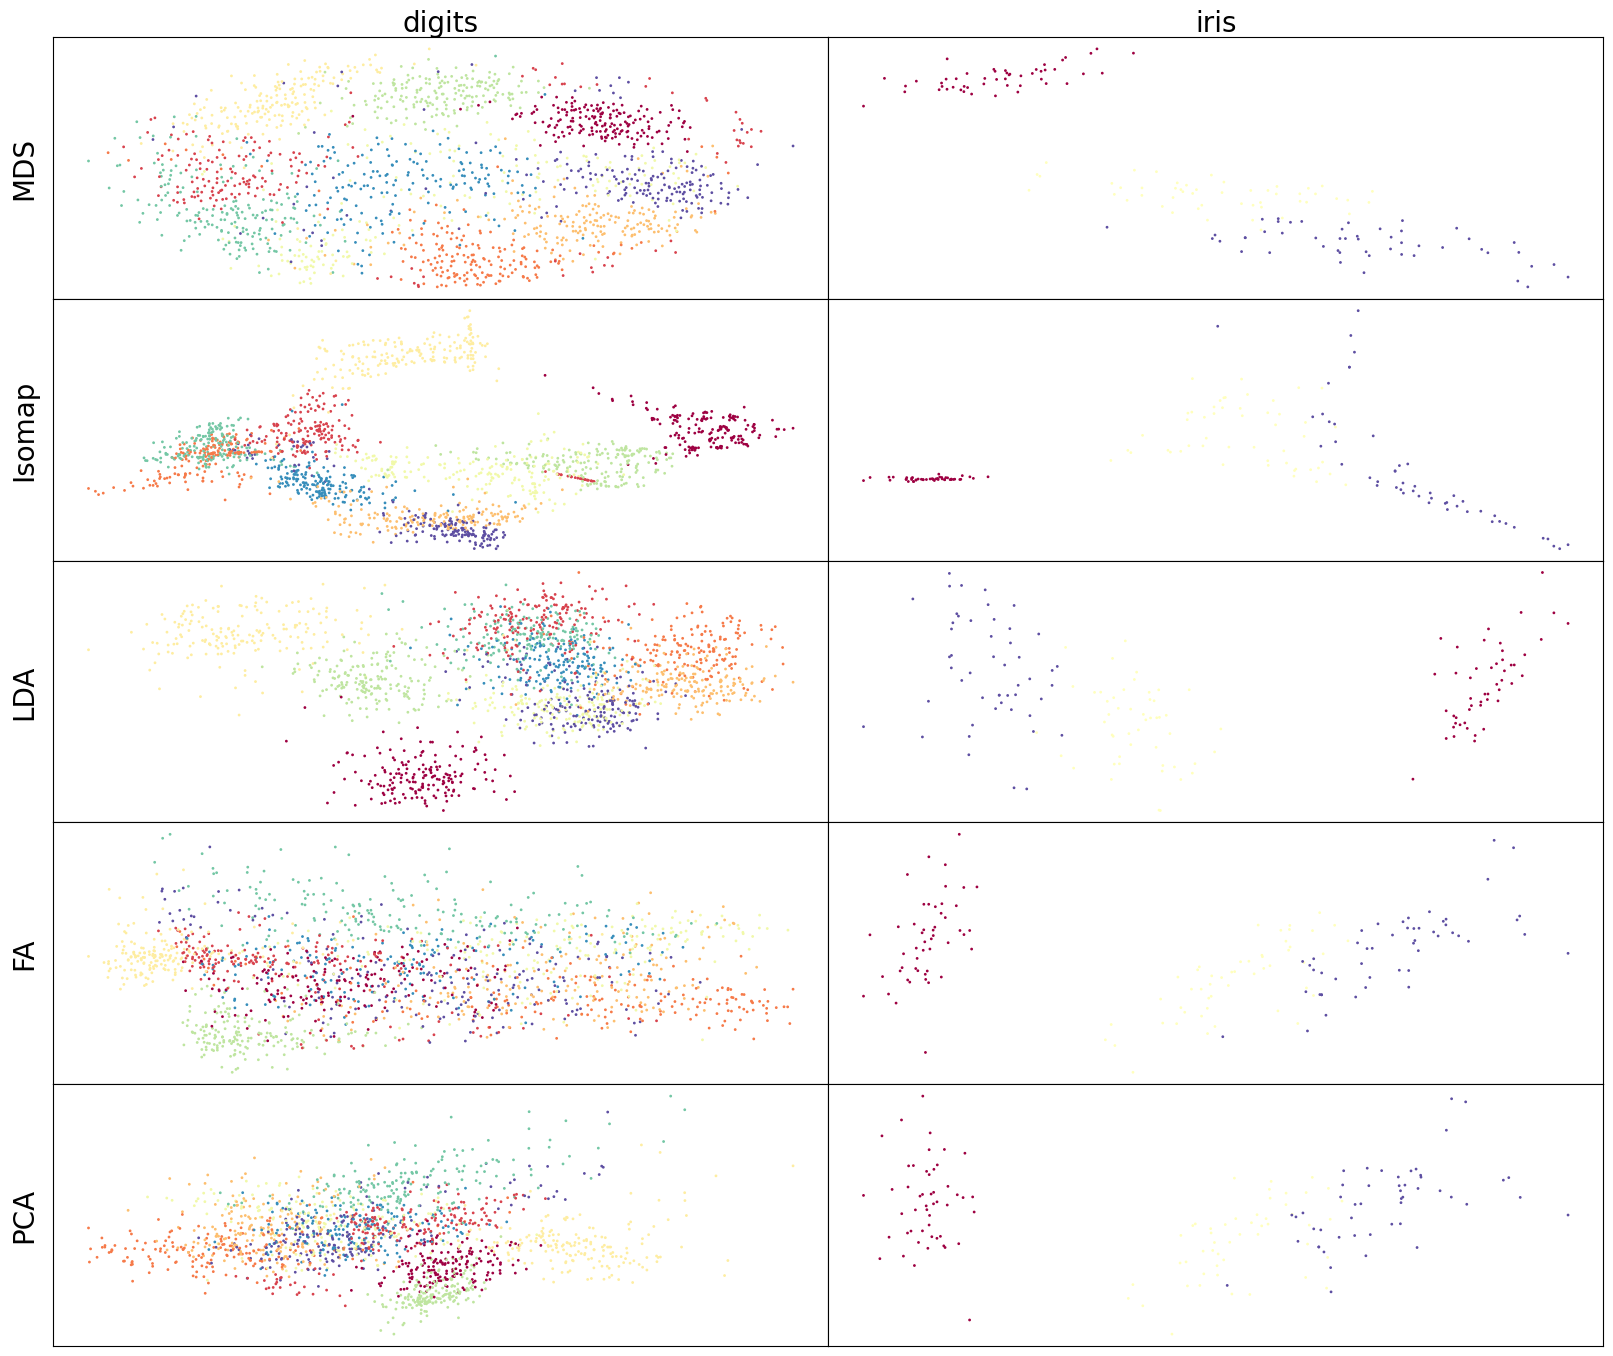

In [48]:
rows = len(models)
cols = len(datasets)
fig = plt.figure(figsize=(20, 17))
gs = fig.add_gridspec(rows, cols, hspace=0, wspace=0)
ax = gs.subplots()
for j in range(cols):
    ax[0, j].set_xlabel(datasets[j][0], fontsize=20)   
    ax[0, j].xaxis.set_label_position('top') 

for i in range(rows):
    ax[i, 0].set_ylabel(models[i][0], fontsize=20)   
    
for i in range(rows):
    for j in range(cols):
        display(f"{models[i][0]} is working with {datasets[j][0]} ({datasets[j][1].shape} objects)...")
        start = time.time()

        if models[i][0] == "LDA":
            embedding = models[i][1].fit_transform(datasets[j][1], datasets[j][2])
        elif models[i][0] == "FA" or models[i][0] == "PCA":
            from sklearn.preprocessing import StandardScaler
            sc = StandardScaler()
            embedding = models[i][1].fit_transform(sc.fit_transform(datasets[j][1]))
        else:
            embedding = models[i][1].fit_transform(datasets[j][1])

        
        ax[i, j].scatter(embedding[:, 0], embedding[:, 1], c=datasets[j][2], cmap='Spectral', s=1)
        ax[i, j].set_yticklabels([])
        ax[i, j].set_xticklabels([])
        ax[i, j].tick_params(left = False, bottom=False)
        display(f"Time: {int(time.time() - start)} seconds")

In [ ]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.scatterplot(x=X_mds[:,0], y=X_mds[:,1], hue=y, palette='Set1', ax=ax[0][0])
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=y, palette='Set1', ax=ax[0][1])
sns.scatterplot(x=X_isomap[:,0], y=X_isomap[:,1], hue=y, palette='Set1', ax=ax[1][0])
sns.scatterplot(x=X_fa[:,0], y=X_fa[:,1], hue=y, palette='Set1', ax=ax[1][1])
ax[0][0].set_title("MDS of IRIS dataset", fontsize=15, pad=15)
ax[0][1].set_title("LDA of IRIS dataset", fontsize=15, pad=15)
ax[1][0].set_title("Isomap of IRIS dataset", fontsize=15, pad=15)
ax[1][1].set_title("FA of IRIS dataset", fontsize=15, pad=15)
# ax[0][0].set_xlabel("MD1", fontsize=12)
# ax[0][0].set_ylabel("MD2", fontsize=12)
# ax[0][1].set_xlabel("LD1", fontsize=12)
# ax[0][1].set_ylabel("LD2", fontsize=12)
# ax[1][0].set_xlabel("IM1", fontsize=12)
# ax[1][0].set_ylabel("IM2", fontsize=12)
# ax[1][1].set_xlabel("FA1", fontsize=12)
# ax[1][1].set_ylabel("FA2", fontsize=12)
plt.savefig('Bla bla bla', dpi=80)